# Mathematics for Machine Learning Pre-Class assignment 1 Wheat and Chessboard Problem 

## Support libs and functions

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def ans(msg, indent=1, width=None, title=None):
    msg = " ANSWER: " + str(msg) + "  "
    lines = msg.split('\n')
    space = " " * indent
    if not width:
        width = max(map(len, lines))
    box = f'╔{"═" * (width + indent * 2)}╗\n'
    if title:
        box += f'║{space}{title:<{width}}{space}║\n'  # title
        box += f'║{space}{"-" * len(title):<{width}}{space}║\n'  # underscore
    box += ''.join([f'║{space}{line:<{width}}{space}║\n' for line in lines])
    box += f'╚{"═" * (width + indent * 2)}╝'  # lower_border
    print("\n"+box)


## [Problem 1] Number of wheat on a 2 x 2 square chess board

In [7]:
n_squares = 4
small_board_list = [[],[]]
ini = 1
for i in range(n_squares//2):
    
    for _ in range(n_squares//2):
        small_board_list[i].append(ini)
        ini = ini*2

ans("Arrange wheat on a plate of 4 squares (list)：{}".format(small_board_list))



╔══════════════════════════════════════════════════════════════════════════╗
║  ANSWER: Arrange wheat on a plate of 4 squares (list)：[[1, 2], [4, 8]]   ║
╚══════════════════════════════════════════════════════════════════════════╝


In [8]:
small_board_ndarray = np.array(small_board_list)
ans("Arrange wheat on a plate of 4 squares (ndarray)：{}".format(small_board_ndarray))


╔═════════════════════════════════════════════════════════════════╗
║  ANSWER: Arrange wheat on a plate of 4 squares (ndarray)：[[1 2] ║
║  [4 8]]                                                         ║
╚═════════════════════════════════════════════════════════════════╝


## [Problem 2] Expansion to n × m mass

In [9]:
def cal(row_, col_):
    a = [1,]
    for _ in range(row_ * col_ -1):
        a.append(2*a[-1])    
    
    return np.array(a).reshape((row_,col_))

In [12]:
ans(cal(8, 8))


╔════════════════════════════════════════════════════════════════════════╗
║  ANSWER: [[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00 ║
║   1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]         ║
║  [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03          ║
║   4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]         ║
║  [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05          ║
║   1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]         ║
║  [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08          ║
║   2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]         ║
║  [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10          ║
║   6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]         ║
║  [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12          ║
║   1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]         ║
║  [2.81474977e+14 5.629

## [Problem 3] Total number of wheat

In [16]:
ans("The total number of wheat on a chess board of 8 x 8 squares is {}".format(cal(8, 8).sum()))


╔══════════════════════════════════════════════════════════════════════════════════════════════════╗
║  ANSWER: The total number of wheat on a chess board of 8 x 8 squares is 1.8446744073709552e+19   ║
╚══════════════════════════════════════════════════════════════════════════════════════════════════╝


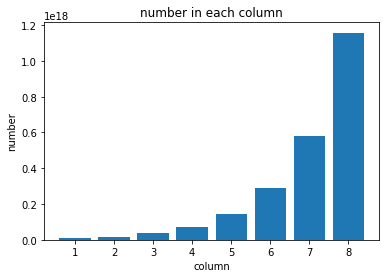

In [20]:
# val = []
# for i in range(0,8):
#     val.append((cal(8, 8)[i].sum()/4))
# print(val)
val = cal(8,8).mean(axis = 0)

%matplotlib inline
plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1,9), np.array(val))
plt.show()

## [Problem 4] Heat map of the number of wheat

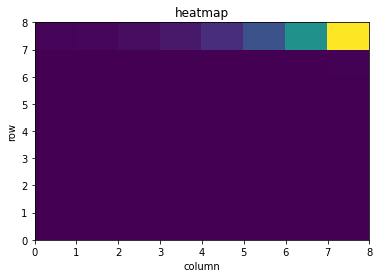

In [21]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(cal(8, 8))
plt.show()

## [Problem 5] How many times is the second half as long as the first half?

In [25]:

ans("The number of wheat in the second half of the chessboard is greater than the number of \n wheat in the first half {} times".format(val[4:8].sum()/val[0:4].sum()))


╔══════════════════════════════════════════════════════════════════════════════════════════════════╗
║  ANSWER: The number of wheat in the second half of the chessboard is greater than the number of  ║
║  wheat in the first half 16.0 times                                                              ║
╚══════════════════════════════════════════════════════════════════════════════════════════════════╝


## [Problem 6] Expansion to n × m mass by another calculation method

## Using np.append

In [32]:
def npappend(row_, col_):
  small_board_ndarray = np.array([1])
  for _ in range(row_ * col_ - 1):
    small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1]).astype(np.uint64)
  return small_board_ndarray.reshape(row_, col_)

ans("Arrange wheat on a plate of 8 x 8 squares Using np.append()：\n{}".format(npappend(8, 8)))


╔═══════════════════════════════════════════════════════════════════════╗
║  ANSWER: Arrange wheat on a plate of 8 x 8 squares Using np.append()： ║
║ [[                  1                   2                   4         ║
║                     8                  16                  32         ║
║                    64                 128]                            ║
║  [                256                 512                1024         ║
║                  2048                4096                8192         ║
║                 16384               32768]                            ║
║  [              65536              131072              262144         ║
║                524288             1048576             2097152         ║
║               4194304             8388608]                            ║
║  [           16777216            33554432            67108864         ║
║             134217728           268435456           536870912         ║
║            1073741824          2147

## Using broadcast

In [34]:

def broadcast(row_, col_):
  indices_of_squares = np.arange(row_ * col_).astype(np.uint64)
  small_board_ndarray = 2**indices_of_squares
  return small_board_ndarray.reshape(row_, col_)

ans("Arrange wheat on a plate of 8 x 8 squares Using broadcast：\n{}".format(broadcast(8, 8)))


╔═════════════════════════════════════════════════════════════════════╗
║  ANSWER: Arrange wheat on a plate of 8 x 8 squares Using broadcast： ║
║ [[                  1                   2                   4       ║
║                     8                  16                  32       ║
║                    64                 128]                          ║
║  [                256                 512                1024       ║
║                  2048                4096                8192       ║
║                 16384               32768]                          ║
║  [              65536              131072              262144       ║
║                524288             1048576             2097152       ║
║               4194304             8388608]                          ║
║  [           16777216            33554432            67108864       ║
║             134217728           268435456           536870912       ║
║            1073741824          2147483648]                   

## [Problem 7] Comparing calculation times

In [ ]:
## [Comparision]

## For loop:

In [36]:
%%timeit
cal(8, 8)

31.9 µs ± 2.61 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## np.append:

In [37]:
%%timeit
npappend(8, 8)

1.4 ms ± 272 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Broadcast:

In [39]:
%%timeit
broadcast(8, 8)

6.73 µs ± 633 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## [Consideration]

## Having seen three different ways, I conlude that the using broadcast is the fastest way while using np.append() is the slowest way (nearly 300 times slower in average).